# Cleansing Data

<h3> Dataset Dictionaries </h3>

Attribute Information(Dictionariy):
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26, 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
   10. irradiat: yes, no.

setelah diperhatikan, seluruh atribut yang terdapat pada dataset merupakan atribut kategorikal.

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing

In [2]:
#import dataset

df = pd.read_excel('breast-cancer.xlsx',sheet_name='Sheet1',na_values='?')
df

,Class,age,menopause,tumor-size,inv-nodes,nodecaps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [3]:
#Check atribut info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   nodecaps     278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


<h3> Handling Outliers </h3>

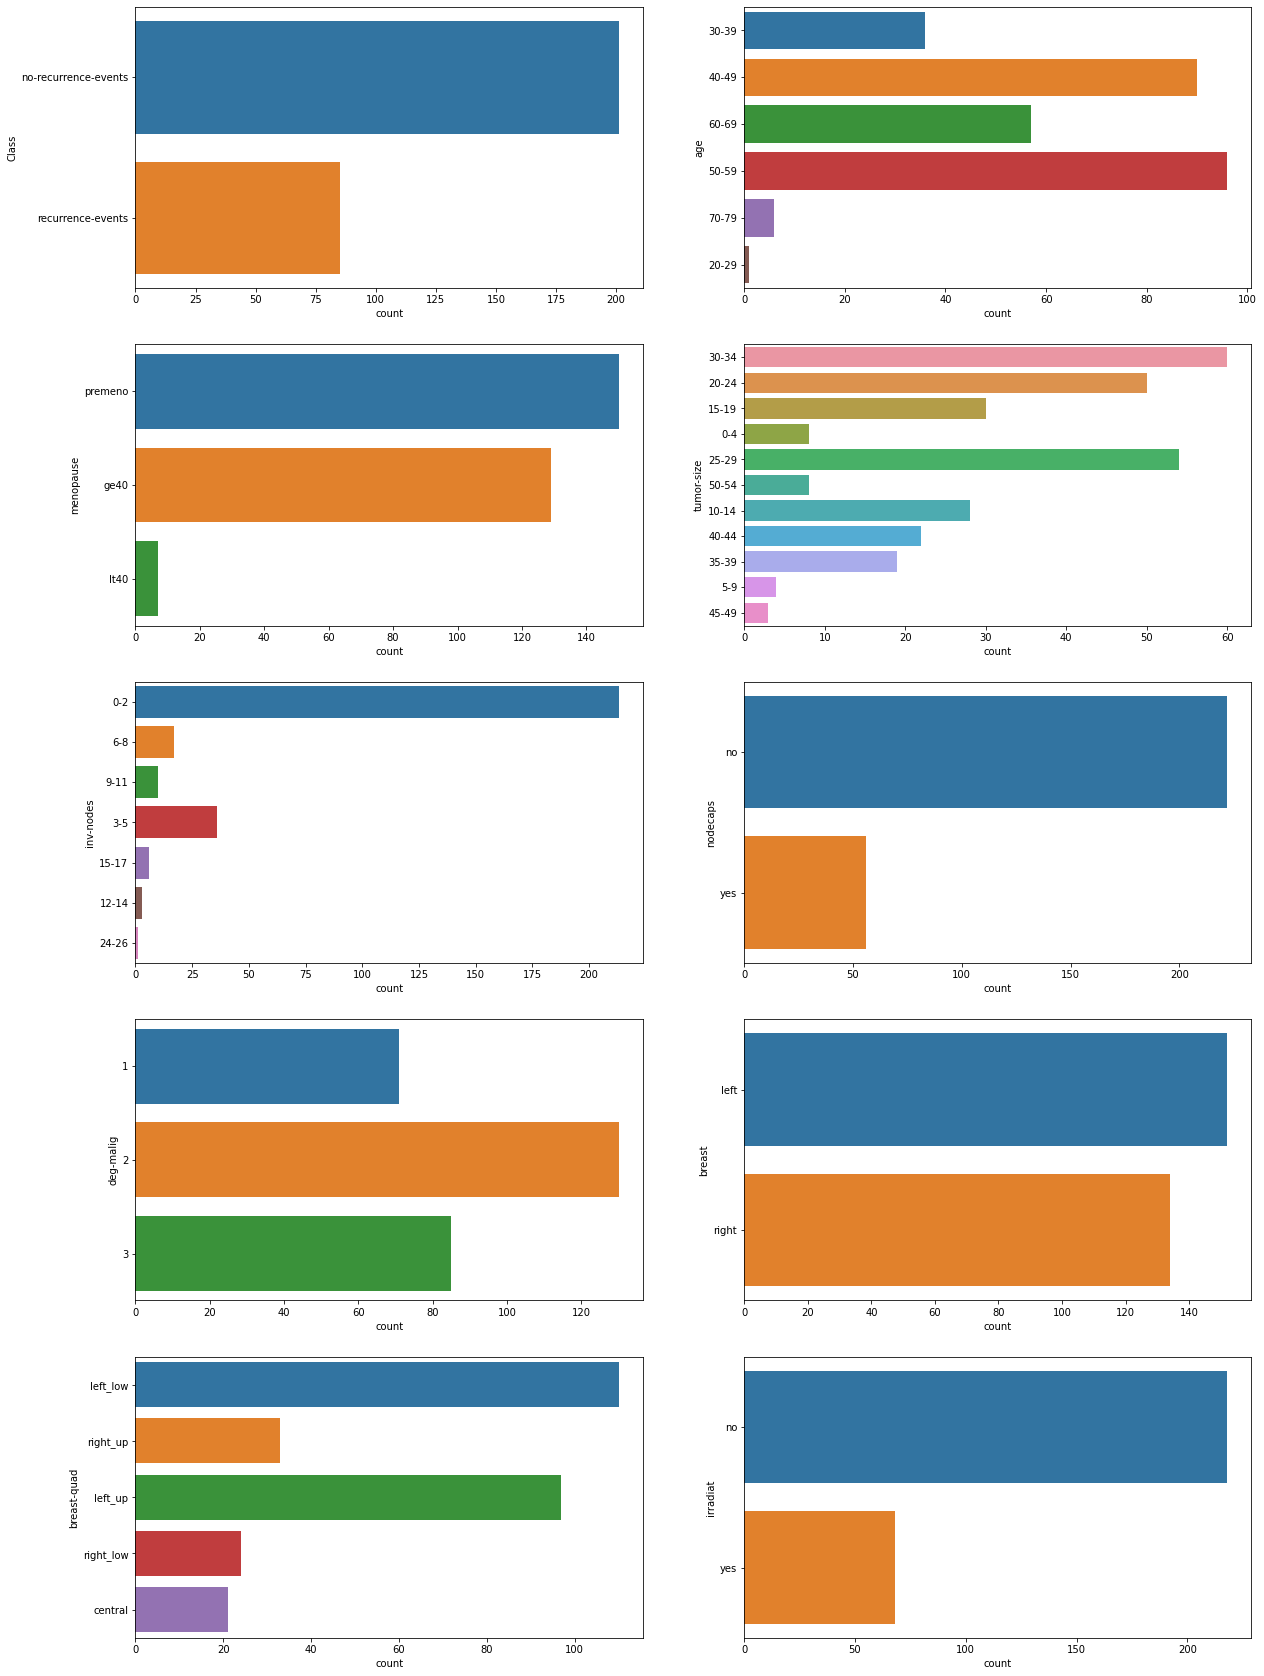

In [4]:
#plotting countplot

fig, axs = plt.subplots(5,2,figsize=(20,30))
plt1 = sns.countplot(y=df['Class'], ax=axs[0,0])
plt2 = sns.countplot(y=df['age'], ax=axs[0,1])
plt3 = sns.countplot(y=df['menopause'], ax=axs[1,0])
plt4 = sns.countplot(y=df['tumor-size'], ax=axs[1,1])
plt5 = sns.countplot(y=df['inv-nodes'], ax=axs[2,0])
plt6 = sns.countplot(y=df['nodecaps'], ax=axs[2,1])
plt7 = sns.countplot(y=df['deg-malig'], ax=axs[3,0])
plt8 = sns.countplot(y=df['breast'], ax=axs[3,1])
plt9 = sns.countplot(y=df['breast-quad'], ax=axs[4,0])
plt10 = sns.countplot(y=df['irradiat'], ax=axs[4,1])
plt.show()

setelah dilakukan countploting untuk seluruh atribut, maka kami dapat melihat values apa saja yang terdapat pada atribut tersebut. setelah dicek seluruh atribut bebas dari outliers.

<h3> Handling Missing Value </h3>

In [5]:
#Cek missing value dari setiap atribut

df.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
nodecaps       8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

terdapat 8 missing values pada atribut nodecaps dan 1 missing value pada atribut breast-cuad

In [6]:
#handling missing value (replace dengan modus)

df['nodecaps'].fillna(df['nodecaps'].mode()[0],inplace=True)
df['breast-quad'].fillna(df['breast-quad'].mode()[0],inplace=True)

In [7]:
df.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
nodecaps       0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

dapat dilihat bahwa sudah tidak ada lagi data yang kosong dari dataset.

# Feature subset selection

In [8]:
#encoding value atribut kategorikal

categorical = df.dtypes==object
categorical_cols = df.columns[categorical].tolist()
df[categorical_cols] = df[categorical_cols].apply(lambda col: preprocessing.LabelEncoder().fit_transform(col))
df

,Class,age,menopause,tumor-size,inv-nodes,nodecaps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,3,0,1,0
1,0,2,2,3,0,0,2,1,4,0
2,0,2,2,3,0,0,2,0,1,0
3,0,4,0,2,0,0,2,1,2,0
4,0,2,2,0,0,0,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...
281,1,1,2,5,0,0,2,0,2,0
282,1,1,2,3,0,0,3,0,2,1
283,1,4,0,3,0,0,1,1,2,0
284,1,2,0,5,4,0,3,0,1,0


# Transformasi Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Class        286 non-null    int32
 1   age          286 non-null    int32
 2   menopause    286 non-null    int32
 3   tumor-size   286 non-null    int32
 4   inv-nodes    286 non-null    int32
 5   nodecaps     286 non-null    int32
 6   deg-malig    286 non-null    int64
 7   breast       286 non-null    int32
 8   breast-quad  286 non-null    int32
 9   irradiat     286 non-null    int32
dtypes: int32(9), int64(1)
memory usage: 12.4 KB


In [10]:
#feature scalling menggunakan method MinMaxScler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.astype(float)), columns=df.columns)
df_scaled

,Class,age,menopause,tumor-size,inv-nodes,nodecaps,deg-malig,breast,breast-quad,irradiat
0,0.0,0.2,1.0,0.5,0.000000,0.0,1.0,0.0,0.25,0.0
1,0.0,0.4,1.0,0.3,0.000000,0.0,0.5,1.0,1.00,0.0
2,0.0,0.4,1.0,0.3,0.000000,0.0,0.5,0.0,0.25,0.0
3,0.0,0.8,0.0,0.2,0.000000,0.0,0.5,1.0,0.50,0.0
4,0.0,0.4,1.0,0.0,0.000000,0.0,0.5,1.0,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...
281,1.0,0.2,1.0,0.5,0.000000,0.0,0.5,0.0,0.50,0.0
282,1.0,0.2,1.0,0.3,0.000000,0.0,1.0,0.0,0.50,1.0
283,1.0,0.8,0.0,0.3,0.000000,0.0,0.0,1.0,0.50,0.0
284,1.0,0.4,0.0,0.5,0.666667,0.0,1.0,0.0,0.25,0.0


<AxesSubplot:ylabel='Density'>

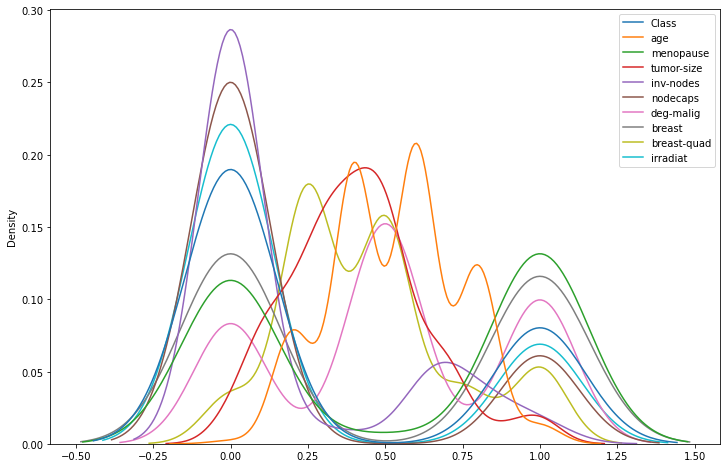

In [11]:
#kdeplot setelah dilakukan MinMaxScaler

fig3 = plt.subplots(figsize=(12,8))
sns.kdeplot(data=df_scaled)

In [12]:
#feature scalling menggunakan method StandardScaler

from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
df_scaled2 = pd.DataFrame(scaler2.fit_transform(df.astype(float)), columns=df.columns)
df_scaled2

,Class,age,menopause,tumor-size,inv-nodes,nodecaps,deg-malig,breast,breast-quad,irradiat
0,-0.650297,-1.647779,0.940728,0.436366,-0.555623,-0.493435,1.290564,-0.938924,-0.718171,-0.558504
1,-0.650297,-0.657727,0.940728,-0.494983,-0.555623,-0.493435,-0.066426,1.065049,2.045017,-0.558504
2,-0.650297,-0.657727,0.940728,-0.494983,-0.555623,-0.493435,-0.066426,-0.938924,-0.718171,-0.558504
3,-0.650297,1.322377,-1.089825,-0.960657,-0.555623,-0.493435,-0.066426,1.065049,0.202891,-0.558504
4,-0.650297,-0.657727,0.940728,-1.892006,-0.555623,-0.493435,-0.066426,1.065049,1.123954,-0.558504
...,...,...,...,...,...,...,...,...,...,...
281,1.537760,-1.647779,0.940728,0.436366,-0.555623,-0.493435,-0.066426,-0.938924,0.202891,-0.558504
282,1.537760,-1.647779,0.940728,-0.494983,-0.555623,-0.493435,1.290564,-0.938924,0.202891,1.790498
283,1.537760,1.322377,-1.089825,-0.494983,-0.555623,-0.493435,-1.423416,1.065049,0.202891,-0.558504
284,1.537760,-0.657727,-1.089825,0.436366,1.514841,-0.493435,1.290564,-0.938924,-0.718171,-0.558504


<AxesSubplot:ylabel='Density'>

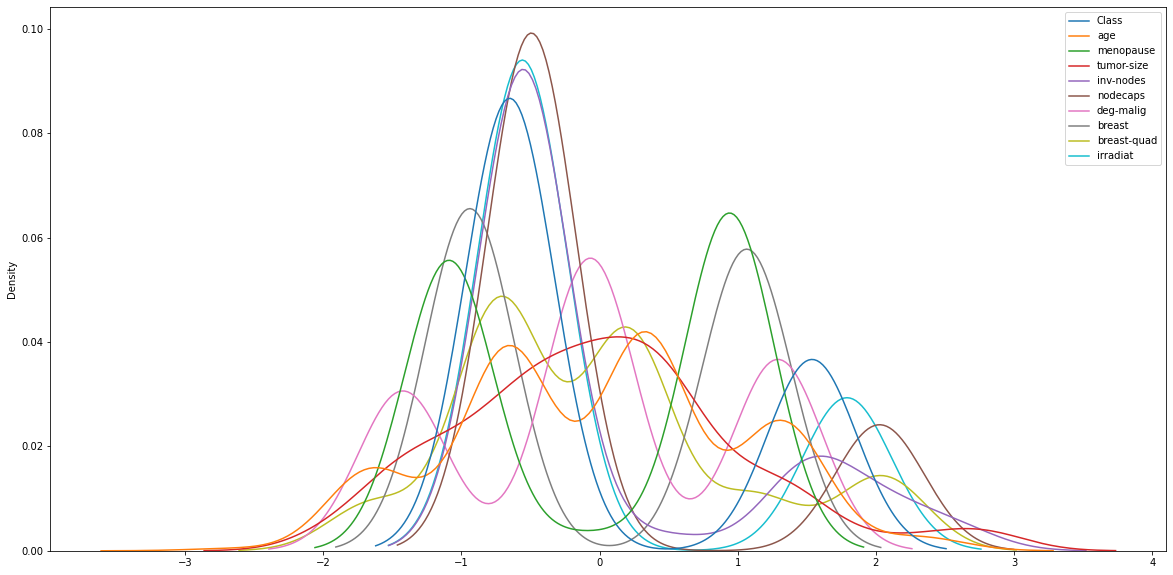

In [13]:
#kdeplot setelah dilakukan StandardScaler

fig4 = plt.subplots(figsize=(20,10))
sns.kdeplot(data=df_scaled2)

# Data Splitting

In [14]:
from sklearn.model_selection import train_test_split

x = df_scaled.drop('irradiat',1)
y = df_scaled['irradiat']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

# Classification

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

## Model Decision Tree

Untuk model decision tree kami melakukan tuning parameter max_depth dengan melakukan try and error. Didapatkan max_depth = 4 adalah parameter yang optimal untuk kasus ini.

In [16]:
from sklearn.tree import DecisionTreeClassifier

model_ID3 = DecisionTreeClassifier(max_depth=4)
model_ID3.fit(x_train, y_train)
y_pred = model_ID3.predict(x_test)
y_pred_train = model_ID3.predict(x_train)

In [17]:
data = {
     'Training Set Accuracy': accuracy_score(y_true = y_train, y_pred = y_pred_train),
     'Test Set Accuracy': accuracy_score(y_true = y_test, y_pred = y_pred)
}

df_models_ID3 = pd.DataFrame(data,index=['Decision Tree'])
df_models_ID3

,Training Set Accuracy,Test Set Accuracy
Decision Tree,0.84,0.813953


### Confusion Matrix Hasil Klasifikasi Data Test Menggunakan Decision Tree

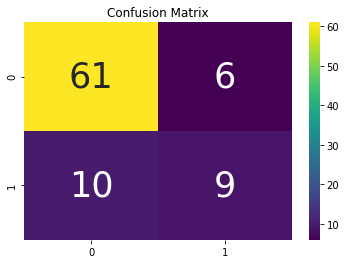

In [18]:
matrix = confusion_matrix(y_test, y_pred) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

### Classification Report Data Test Menggunakan Decision Tree

In [19]:
print('Classification Report : ')
print(classification_report(y_test, y_pred))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.88        67
         1.0       0.60      0.47      0.53        19

    accuracy                           0.81        86
   macro avg       0.73      0.69      0.71        86
weighted avg       0.80      0.81      0.81        86



## Naive Bayes Model

In [20]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(x_train, y_train)
y_pred_NB = model_NB.predict(x_test)
y_pred_train_NB = model_NB.predict(x_train)

In [21]:
data = {
     'Training Set Accuracy': accuracy_score(y_true = y_train, y_pred = y_pred_train_NB),
     'Test Set Accuracy': accuracy_score(y_true = y_test, y_pred = y_pred_NB)
}

df_models_NB = pd.DataFrame(data,index=['Naive Bayes'])
df_models_NB

,Training Set Accuracy,Test Set Accuracy
Naive Bayes,0.75,0.825581


### Confusion Matrix Hasil Klasifikasi Data Test Menggunakan Naive Bayes

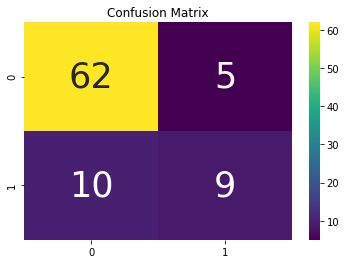

In [22]:
matrix = confusion_matrix(y_test, y_pred_NB) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

### Classification Report Data Test Menggunakan Naive Bayes

In [23]:
print('Classification Report : ')
print(classification_report(y_test, y_pred_NB))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89        67
         1.0       0.64      0.47      0.55        19

    accuracy                           0.83        86
   macro avg       0.75      0.70      0.72        86
weighted avg       0.81      0.83      0.82        86



## Perbandingan Akurasi Model Decision Tree dengan Naive Bayes

In [24]:
data = {
    'Train Set Accuracy' : [accuracy_score(y_true = y_train, y_pred = y_pred_train),
                           accuracy_score(y_true = y_train, y_pred = y_pred_train_NB)],
    'Test Set Accuracy' : [accuracy_score(y_true = y_test, y_pred = y_pred), 
                            accuracy_score(y_true = y_test, y_pred = y_pred_NB)]
}

df_models_compare = pd.DataFrame(data,index=['Decision Tree','Naive Bayes'])
df_models_compare

,Train Set Accuracy,Test Set Accuracy
Decision Tree,0.84,0.813953
Naive Bayes,0.75,0.825581
